# Data Transformation using numpy 

Here I provide further examples of how to transform data to make it more Gaussian using the transform method and the various transformations available in the numpy software library. 

In [1]:
# Starting with imports of key libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# Importing titanic dataset to work with:

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

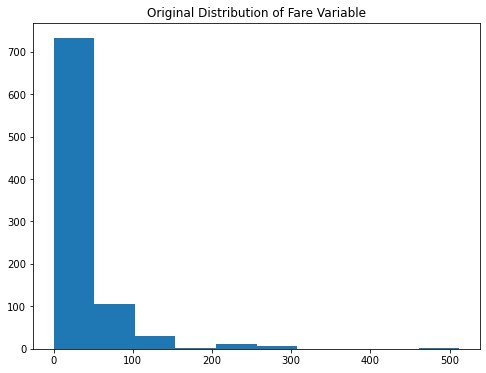

In [5]:
# I will use the Fare variable for transformation as this is not normally distributed.
# Note: the variable has no missing values so I don't need to drop any rows. 
# Plotting the distribution of this variable:

fig, ax = plt.subplots(figsize = (8, 6))

ax = plt.hist(df['Fare'])
plt.title('Original Distribution of Fare Variable')
plt.show()

In [6]:
# Transforming the Fare variable. Applying the sqrt, exp, log, and reciprocal transform:
df['sqrt_fare'] = np.sqrt(df['Fare'])
df['exp_fare'] = np.exp(df['Fare'])
df['log_fare'] = np.log1p(df['Fare'])
df['recip_fare'] = np.reciprocal(df['Fare']+1)

# Need to add 1 to reciprocal to avoid infinity problem. 

In [7]:
# Checking these variables have been added:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sqrt_fare,exp_fare,log_fare,recip_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.692582,1.408105e+03,2.110213,0.121212
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8.442944,9.077031e+30,4.280593,0.013834
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.815138,2.765564e+03,2.188856,0.112045
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.286975,1.150898e+23,3.990834,0.018484
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.837252,3.133795e+03,2.202765,0.110497


In [8]:
# Creating a new matrix consisting of these four transformed variables:

fare_tr = df[['sqrt_fare', 'exp_fare', 'log_fare', 'recip_fare']]

fare_tr

,sqrt_fare,exp_fare,log_fare,recip_fare
0,2.692582,1.408105e+03,2.110213,0.121212
1,8.442944,9.077031e+30,4.280593,0.013834
2,2.815138,2.765564e+03,2.188856,0.112045
3,7.286975,1.150898e+23,3.990834,0.018484
4,2.837252,3.133795e+03,2.202765,0.110497
...,...,...,...,...
886,3.605551,4.424134e+05,2.639057,0.071429
887,5.477226,1.068647e+13,3.433987,0.032258
888,4.842520,1.528289e+10,3.196630,0.040900
889,5.477226,1.068647e+13,3.433987,0.032258


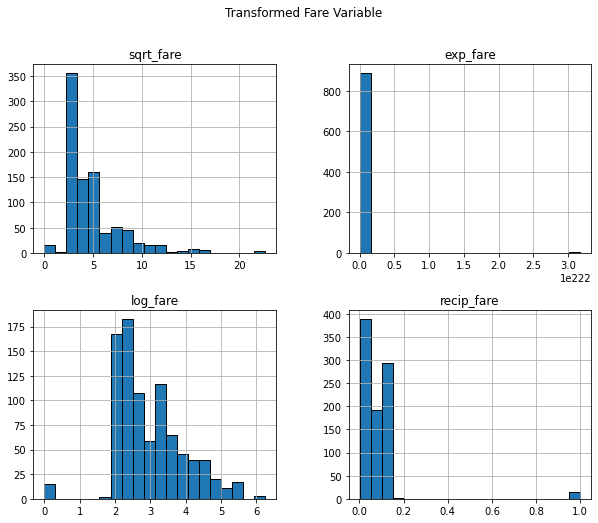

In [9]:
# Creating a 2x2 layout of histograms so that the effect of the different transformations can be compared. It looks
# like the log transformation has worked much better than the others. 

fare_tr.hist(bins = 20, layout = (2, 2), edgecolor = 'k', figsize = (10, 8))
plt.suptitle('Transformed Fare Variable')
plt.show()

In [10]:
# If we get descriptives for the reciprocal transformed fare variable we can see that adding 1 to the formula has made the 
# formula valid. The max is now shown as 1 rather than infinity. The infinity issue seems to be caused by dividing by 0. 
df['recip_fare'].describe()

count    891.000000
mean       0.082021
std        0.126894
min        0.001948
25%        0.031250
50%        0.064707
75%        0.112229
max        1.000000
Name: recip_fare, dtype: float64